In [78]:
import pandas as pd
import numpy as np
import os

In [79]:
os.chdir(r'D:\DATA\Data Sets\AB_NYC_2019.csv')

df = pd.read_csv('sample.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [80]:
df.shape

(48895, 16)

In [81]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [88]:
df.price.min(), df.price.max()

(10.0, 10000.0)

In [90]:
df.price.replace(0,df.price.mean(), inplace=True)

In [91]:
df.price.mean(), df.price.median()

(152.75504504671346, 106.0)

In [92]:
p45 = df.price.quantile(0.45)
p75 = df.price.quantile(0.75)
p95 = df.price.quantile(0.95)
p100 = df.price.quantile(1)

p45, p75, p95, p100

(100.0, 175.0, 355.0, 10000.0)

<AxesSubplot:xlabel='price', ylabel='Count'>

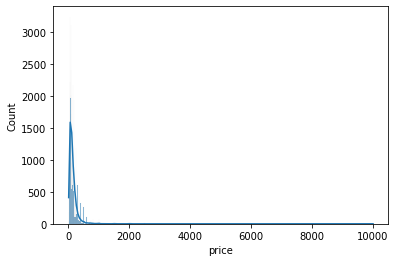

In [93]:
import seaborn as sns 

sn.histplot(df.price, kde = True)

In [94]:
df_without_outliers = df[(df.price>p45) & (df.price<p95)]
df_without_outliers.shape

(22527, 16)

<AxesSubplot:xlabel='price', ylabel='Count'>

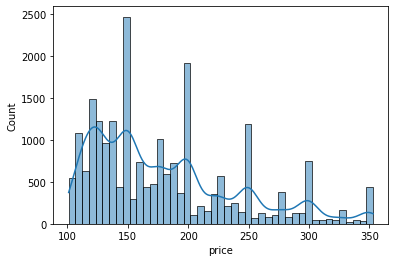

In [95]:
sn.histplot(df_without_outliers.price, kde = True)

In [96]:
df_without_outliers.price.describe()

count    22527.000000
mean       180.627422
std         60.413266
min        101.000000
25%        130.000000
50%        165.000000
75%        210.000000
max        353.000000
Name: price, dtype: float64